In [1]:
# Google Driveと接続を行います。これを行うことで、Driveにあるデータにアクセスできるようになります。
# 下記セルを実行すると、Googleアカウントのログインを求められますのでログインしてください。
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 作業フォルダへの移動を行います。
# 人によって作業場所がことなるので、その場合作業場所を変更してください。
import os 
os.chdir('/content/drive/MyDrive/100knock-data_analytics/11章') #ここを変更。

# 11章　深層学習に挑戦する10本ノック
ここでは、深層学習を学ぶうえで必要なプログラムを実行していく流れを学んでいきます。

### 放課後ノック101：深層学習に必要なデータを準備しよう

In [3]:
from tensorflow.keras import datasets, layers, models
import numpy as np

### データを読み込んでみよう

In [4]:
# 学習用データ/検証用データの読み込み
mnist = datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### データを確認しよう

In [5]:
# 形状の出力
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
# 0番目のデータの形状の出力
X_train[0].shape

(28, 28)

In [7]:
# 0番目のデータの出力
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
# 0番目のデータの表示
from google.colab.patches import cv2_imshow
cv2_imshow(X_train[0])

In [9]:
# 正解データの出力
y_train[0]

5

### データを準備しよう

In [10]:
# データを0から1の範囲に収めるために255で割る
X_train_sc, X_test_sc = X_train / 255.0, X_test / 255.0

In [11]:
# 形状を整える
X_train_sc = X_train_sc.reshape((60000, 28, 28, 1))
X_test_sc = X_test_sc.reshape((10000, 28, 28, 1))

### 放課後ノック102：深層学習モデルを構築しよう

### ニューラルネットワークモデルを定義しよう

In [12]:
model1 = models.Sequential()
model1.add(layers.Flatten(input_shape=(28, 28)))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(10, activation='softmax'))

In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### CNNモデルを定義しよう

In [14]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))

model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [15]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

### ニューラルネットワークモデルを構築しよう

In [16]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(X_train_sc, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2212 - accuracy: 0.9344
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0972 - accuracy: 0.9704
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0698 - accuracy: 0.9778
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0545 - accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0422 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0367 - accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0316 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0264 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0253 - accuracy: 0.9919
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.021

### CNNモデルを構築しよう

In [17]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train_sc, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 3ms/step - loss: 0.1516 - accuracy: 0.9523
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0461 - accuracy: 0.9858
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0332 - accuracy: 0.9895
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0264 - accuracy: 0.9912
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0192 - accuracy: 0.9939
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0162 - accuracy: 0.9947
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0126 - accuracy: 0.9963
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0116 - accuracy: 0.9963
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0095 - accuracy: 0.9967
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.00

### 放課後ノック103：モデルの評価をしてみよう

In [18]:
# モデル１の正解率の出力
model1_test_loss, model1_test_acc = model1.evaluate(X_test_sc, y_test)
print(model1_test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0756 - accuracy: 0.9820
0.9819999933242798


In [19]:
# モデル２の正解率の出力
model2_test_loss, model2_test_acc = model2.evaluate(X_test_sc, y_test)
print(model2_test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0330 - accuracy: 0.9922
0.9922000169754028


### 放課後ノック104：モデルを使った予測をしてみよう

In [20]:
# 予測の実行
predictions = model2.predict(X_train_sc)

In [21]:
# 予測結果の形状の出力
predictions.shape

(60000, 10)

In [22]:
predictions

array([[6.4067377e-13, 2.6711968e-11, 1.2809889e-12, ..., 7.4363801e-14,
        2.2874580e-09, 6.6876709e-09],
       [1.0000000e+00, 8.9349239e-16, 2.0278538e-11, ..., 2.2918187e-15,
        5.8768831e-15, 1.1887918e-11],
       [6.1172973e-20, 3.5370613e-11, 7.8098162e-12, ..., 1.8703113e-14,
        1.7679083e-12, 8.5369758e-12],
       ...,
       [1.3769247e-15, 3.9672215e-13, 8.7876194e-18, ..., 2.0399664e-17,
        2.3522048e-13, 5.9116937e-06],
       [1.0268884e-11, 1.9402304e-09, 1.8677064e-13, ..., 8.9505085e-17,
        1.7057629e-10, 1.0431529e-15],
       [1.8713256e-13, 1.0334761e-16, 8.3735407e-14, ..., 3.8000320e-17,
        1.0000000e+00, 4.2105855e-10]], dtype=float32)

In [23]:
# 0番目の出力
predictions[0]

array([6.4067377e-13, 2.6711968e-11, 1.2809889e-12, 4.5973298e-05,
       4.7373116e-14, 9.9995399e-01, 1.7218145e-11, 7.4363801e-14,
       2.2874580e-09, 6.6876709e-09], dtype=float32)

In [24]:
# 最も高い確率の数字の出力
np.argmax(predictions[0])

5

In [25]:
y_train[0]

5

### 放課後ノック105：物体検出YOLOを使って人の検出を行ってみよう

### YOLOの準備

In [26]:
#yolov3-tf2のダウンロード
!git clone https://github.com/zzh8829/yolov3-tf2.git ./yolov3_tf2
%cd ./yolov3_tf2
!git checkout c43df87d8582699aea8e9768b4ebe8d7fe1c6b4c
%cd ../

fatal: destination path './yolov3_tf2' already exists and is not an empty directory.
/content/drive/MyDrive/100knock-data_analytics/11章/yolov3_tf2
HEAD is now at c43df87 Update dataset.py
/content/drive/MyDrive/100knock-data_analytics/11章


In [27]:
#YOLOの学習済みモデルのダウンロード
!wget https://pjreddie.com/media/files/yolov3-tiny.weights 

--2022-08-17 01:31:15--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights.2’

yolov3-tiny.weights 100%[===================>]  33.79M  37.4MB/s    in 0.9s    

2022-08-17 01:31:16 (37.4 MB/s) - ‘yolov3-tiny.weights.2’ saved [35434956/35434956]



In [28]:
#ダウンロードしたYOLOの学習済みモデルをKerasから利用出来る形に変換
!python ./yolov3_tf2/convert.py --weights ./yolov3-tiny.weights --output  ./yolov3_tf2/checkpoints/yolov3-tiny.tf --tiny

Model: "yolov3_tiny"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 yolo_darknet (Functional)      ((None, None, None,  6298480     ['input[0][0]']                  
                                 256),                                                            
                                 (None, None, None,                                               
                                 1024))                                                           
                                                                                        

### YOLOによる物体検出の実行

In [29]:
from absl import app, logging, flags
from absl.flags import FLAGS
app._run_init(['yolov3'], app.parse_flags_with_usage)

['yolov3']

In [30]:
#学習済みの重みをそのまま利用する場合
from  yolov3_tf2.yolov3_tf2.models import  YoloV3Tiny, YoloLoss
import tensorflow as tf
from yolov3_tf2.yolov3_tf2.dataset import transform_images
from yolov3_tf2.yolov3_tf2.utils import draw_outputs
import numpy as np

FLAGS.yolo_iou_threshold = 0.5
FLAGS.yolo_score_threshold = 0.5

yolo_class_names = [c.strip() for c in open("./yolov3_tf2/data/coco.names").readlines()]

yolo = YoloV3Tiny(classes=80)
#重みの読み込み
yolo.load_weights("./yolov3_tf2/checkpoints/yolov3-tiny.tf").expect_partial()

In [31]:
img_filename = "img/img01.jpg"
img_rawP = tf.image.decode_jpeg(open(img_filename, 'rb').read(), channels=3)
data_shape=(256,256,3)
img_yoloP = transform_images(img_rawP, data_shape[0])
img_yoloP = np.expand_dims(img_yoloP, 0)
#予測開始
boxes, scores, classes, nums = yolo.predict(img_yoloP)

### 結果の出力

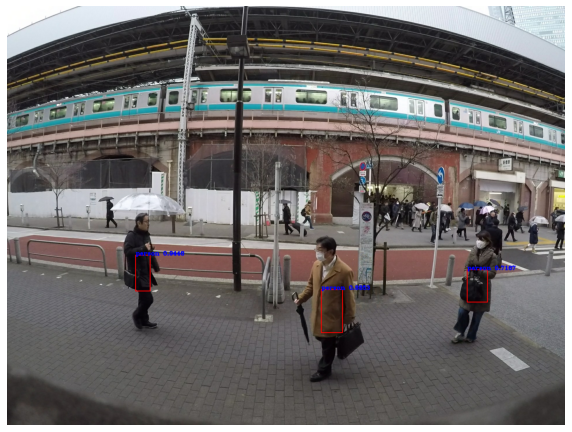

In [32]:
import matplotlib.pyplot as plt

img_yoloP = img_rawP.numpy()
img_yoloP = draw_outputs(img_yoloP, (boxes, scores, classes, nums), yolo_class_names)

plt.figure(figsize=(10,10))
plt.imshow(img_yoloP)
plt.axis('off')
plt.show()

### 放課後ノック106：YOLOの学習を行うための準備をしよう

### 学習データのダウンロード

In [33]:
#データセットのダウンロード及び解凍を行います。
#ダウンロード済みでない場合以下を実行して下さい。
!wget http://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
!tar -xvf ./VOCtrainval_06-Nov-2007.tar

ストリーミング出力は最後の 5000 行に切り捨てられました。
VOCdevkit/VOC2007/JPEGImages/001732.jpg
VOCdevkit/VOC2007/JPEGImages/001733.jpg
VOCdevkit/VOC2007/JPEGImages/001734.jpg
VOCdevkit/VOC2007/JPEGImages/001738.jpg
VOCdevkit/VOC2007/JPEGImages/001739.jpg
VOCdevkit/VOC2007/JPEGImages/001741.jpg
VOCdevkit/VOC2007/JPEGImages/001746.jpg
VOCdevkit/VOC2007/JPEGImages/001747.jpg
VOCdevkit/VOC2007/JPEGImages/001749.jpg
VOCdevkit/VOC2007/JPEGImages/001750.jpg
VOCdevkit/VOC2007/JPEGImages/001752.jpg
VOCdevkit/VOC2007/JPEGImages/001754.jpg
VOCdevkit/VOC2007/JPEGImages/001755.jpg
VOCdevkit/VOC2007/JPEGImages/001756.jpg
VOCdevkit/VOC2007/JPEGImages/001758.jpg
VOCdevkit/VOC2007/JPEGImages/001759.jpg
VOCdevkit/VOC2007/JPEGImages/001761.jpg
VOCdevkit/VOC2007/JPEGImages/001765.jpg
VOCdevkit/VOC2007/JPEGImages/001766.jpg
VOCdevkit/VOC2007/JPEGImages/001768.jpg
VOCdevkit/VOC2007/JPEGImages/001771.jpg
VOCdevkit/VOC2007/JPEGImages/001772.jpg
VOCdevkit/VOC2007/JPEGImages/001775.jpg
VOCdevkit/VOC2007/JPEGImages/001777.jpg
VOCdevki

### 学習データの確認

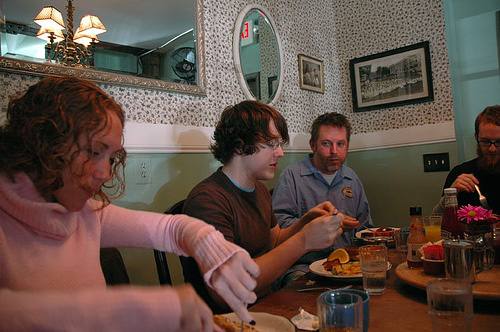

In [34]:
from PIL import Image

#ダウンロードしたデータセットの画像の内１枚を表示
Image.open("./VOCdevkit/VOC2007/JPEGImages/006626.jpg")

In [35]:
#表示した画像のアノテーションデータの表示
annotation = open("./VOCdevkit/VOC2007/Annotations/006626.xml").read()
print(annotation)

<annotation>
	<folder>VOC2007</folder>
	<filename>006626.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
		<flickrid>315496020</flickrid>
	</source>
	<owner>
		<flickrid>Dan Mall</flickrid>
		<name>Dan Mall</name>
	</owner>
	<size>
		<width>500</width>
		<height>332</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>diningtable</name>
		<pose>Unspecified</pose>
		<truncated>1</truncated>
		<difficult>1</difficult>
		<bndbox>
			<xmin>213</xmin>
			<ymin>228</ymin>
			<xmax>500</xmax>
			<ymax>332</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Frontal</pose>
		<truncated>1</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>443</xmin>
			<ymin>106</ymin>
			<xmax>500</xmax>
			<ymax>213</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Unspecified</pose>
		<truncated>1</truncated>
		<difficult>0</difficult>
		<bndbox>
			<

### 放課後ノック107：新たな学習データを使ってYOLOの学習モデルを生成してみよう

### ライブラリのインストール

In [36]:
!pip install xmltodict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 学習データの変換

In [37]:
import xmltodict
import numpy as np
from tensorflow.keras.utils import Sequence
import math
import yolov3_tf2.yolov3_tf2.dataset as dataset

yolo_max_boxes = 100

#アノテーションデータの変換
def parse_annotation(annotation, class_map):
    label = []
    width = int(annotation['size']['width'])
    height = int(annotation['size']['height'])
    
    if 'object' in annotation:
        if type(annotation['object']) != list:
            tmp = [annotation['object']]
        else:
            tmp = annotation['object']
            
        for obj in tmp:
            _tmp = []
            _tmp.append(float(obj['bndbox']['xmin']) / width)
            _tmp.append(float(obj['bndbox']['ymin']) / height)
            _tmp.append(float(obj['bndbox']['xmax']) / width)
            _tmp.append(float(obj['bndbox']['ymax']) / height)
            _tmp.append(class_map[obj['name']])
            label.append(_tmp)

    for _ in range(yolo_max_boxes - len(label)):
      label.append([0,0,0,0,0])
    return label

### 学習データ読み込みクラスの定義

In [38]:
from yolov3_tf2.yolov3_tf2.dataset import transform_images

#学習時に画像データを必要な分だけ読み込むためのクラス
class ImageDataSequence(Sequence):
    def __init__(self, file_name_list, batch_size,  anchors, anchor_masks, class_names, data_shape=(256,256,3)):
        
        #クラス名とそれに対応する数値、という形の辞書を作る
        self.class_map = {name: idx for idx, name in enumerate(class_names)}
        self.file_name_list = file_name_list

        self.image_file_name_list = ["./VOCdevkit/VOC2007/JPEGImages/"+image_path + ".jpg" for image_path in self.file_name_list]
        self.annotation_file_name_list = ['./VOCdevkit/VOC2007/Annotations/' + image_path+ ".xml" for image_path in self.file_name_list]

        self.length = len(self.file_name_list)
        self.data_shape = data_shape
        self.batch_size = batch_size
        self.anchors = anchors
        self.anchor_masks = anchor_masks

        self.labels_cache = [None for i in range(self.__len__())]

    #１バッチごとに自動的に呼ばれる。画像データとそのラベルを必要な分だけ読み込んで返す
    def __getitem__(self, idx):
        images = []
        labels = []
        
        #現在のバッチが何回目か、がidx変数に入っているため、それに対応するデータを読み込む
        for index in range(idx*self.batch_size, (idx+1)*self.batch_size):

          #アノテーションデータをラベルとして使える形に変換する
          annotation = xmltodict.parse((open(self.annotation_file_name_list[index]).read()))
          label = parse_annotation(annotation["annotation"], self.class_map)
          labels.append(label)

          #画像データの読み込みと加工
          img_raw = tf.image.decode_jpeg(open(self.image_file_name_list[index], 'rb').read(), channels=3)
          img = transform_images(img_raw, self.data_shape[0])
          images.append(img)
        
        #ラベルに対しても前処理をするが、時間がかかるため１度読み込んだらキャッシュとして保存する
        if self.labels_cache[idx] is None:
          labels = tf.convert_to_tensor(labels, tf.float32)
          labels = dataset.transform_targets(labels, self.anchors, self.anchor_masks, self.data_shape[0])
          self.labels_cache[idx] = labels
        else: 
          labels = self.labels_cache[idx]

        images = np.array(images)
        return images, labels

    def __len__(self):
        return math.floor(len(self.file_name_list) / self.batch_size)


### YOLOモデル(ネットワーク)の読み込み

In [39]:
from  yolov3_tf2.yolov3_tf2.models import  YoloV3Tiny, YoloLoss
from yolov3_tf2.yolov3_tf2.utils import freeze_all
import tensorflow as tf

batch_size=16
data_shape=(416,416,3)
class_names =  ["person", "bird", "cat","cow","dog", "horse","sheep", "aeroplane", "bicycle", "boat", "bus", "car", "motorbike", "train", "bottle", "chair", "diningtable", "pottedplant", "sofa", "tvmonitor"]

anchors = np.array([(10, 14), (23, 27), (37, 58),
                              (81, 82), (135, 169),  (344, 319)],
                             np.float32) / data_shape[0]
anchor_masks = np.array([[3, 4, 5], [0, 1, 2]])

# yolov3_tf2で定義されているtiny YOLOのモデルを読み込む
model_pretrained = YoloV3Tiny(data_shape[0], training=True, classes=80)
model_pretrained.load_weights("./yolov3_tf2/checkpoints/yolov3-tiny.tf").expect_partial()

model = YoloV3Tiny(data_shape[0], training=True, classes=len(class_names))
#ここで、学習済みモデルの出力層以外の重みだけを取り出す
model.get_layer('yolo_darknet').set_weights(model_pretrained.get_layer('yolo_darknet').get_weights())
#出力層以外を学習しないようにする
freeze_all(model.get_layer('yolo_darknet'))

In [40]:
loss = [YoloLoss(anchors[mask], classes=len(class_names)) for mask in anchor_masks]
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss=loss, run_eagerly=False)

#モデルの構造を出力
model.summary()

Model: "yolov3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 416, 416, 3  0           []                               
                                )]                                                                
                                                                                                  
 yolo_darknet (Functional)      ((None, None, None,  6298480     ['input[0][0]']                  
                                 256),                                                            
                                 (None, None, None,                                               
                                 1024))                                                           
                                                                                             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### 学習データの読み込み

In [41]:
train_file_name_list = open("./VOCdevkit/VOC2007/ImageSets/Main/train.txt").read().splitlines()
validation_file_name_list = open("./VOCdevkit/VOC2007/ImageSets/Main/val.txt").read().splitlines()

train_dataset = ImageDataSequence(train_file_name_list, batch_size, anchors, anchor_masks, class_names, data_shape=data_shape)
validation_dataset = ImageDataSequence(validation_file_name_list, batch_size, anchors, anchor_masks, class_names, data_shape=data_shape)

### 学習の実施

In [42]:
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=1)

W0817 01:34:08.770875 140037354174336 deprecation.py:547] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/util/deprecation.py:616: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Use fn_output_signature instead


156/156 [==============================] - 498s 3s/step - loss: 178.8305 - yolo_output_0_loss: 32.4310 - yolo_output_1_loss: 142.5486 - val_loss: 40.0886 - val_yolo_output_0_loss: 13.8588 - val_yolo_output_1_loss: 22.3611


In [43]:
#学習した重みの保存
model.save_weights('./saved_models/model_yolo_weights')

### 放課後ノック108：新たに学習させたモデルを使って人の検出を行ってみよう

### 学習した重みの読み込み

In [44]:
from absl import app, logging, flags
from absl.flags import FLAGS
app._run_init(['yolov3'], app.parse_flags_with_usage)

['yolov3']

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from yolov3_tf2.yolov3_tf2.utils import draw_outputs

FLAGS.yolo_iou_threshold = 0.5
FLAGS.yolo_score_threshold = 0.5

yolo_trained = YoloV3Tiny(classes=len(class_names))
#保存した重みの読み込み
yolo_trained.load_weights('./saved_models/model_yolo_weights').expect_partial()

### 物体検出の実行

In [46]:
img_filename = "img/img01.jpg"

#画像の読み込み
img_rawL = tf.image.decode_jpeg(open(img_filename, 'rb').read(), channels=3)
img_yoloL = transform_images(img_rawL, data_shape[0])
img_yoloL = np.expand_dims(img_yoloL, 0)


#予測開始
boxes, scores, classes, nums = yolo_trained.predict(img_yoloL)

### 結果の表示

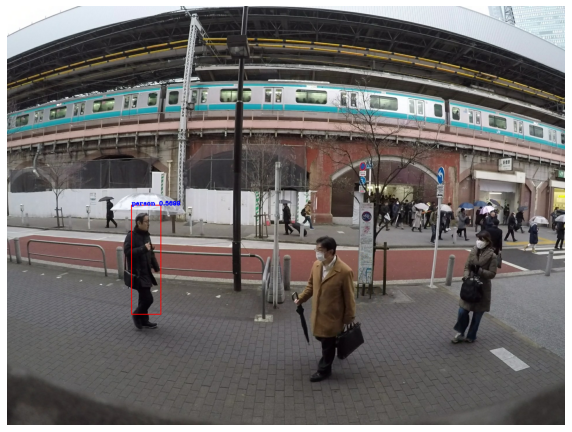

In [47]:
img_yoloL = img_rawL.numpy()

#予測結果を画像に書き込み
img_yoloL = draw_outputs(img_yoloL, (boxes, scores, classes, nums), class_names)

#予測結果を書き込んだ画像の表示
plt.figure(figsize=(10,10))
plt.imshow(img_yoloL)
plt.axis('off')
plt.show()

### 放課後ノック109：YOLOとHOGの人の検出結果を比較して深層学習の精度を体感しよう

### HOGによる人の検出

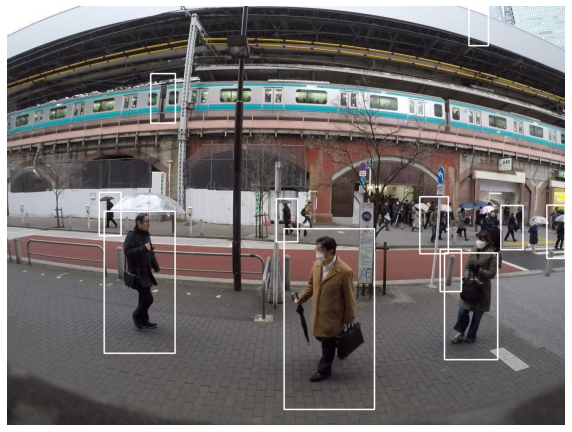

In [48]:
import cv2
from google.colab.patches import cv2_imshow

# 準備 #
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (8, 8), 'padding': (32, 32), 'scale': 1.05, 'hitThreshold':0, 'groupThreshold':5}

# 検出 #
img_hog = cv2.imread("img/img01.jpg")
gray = cv2.cvtColor(img_hog, cv2.COLOR_BGR2GRAY)
human, r = hog.detectMultiScale(gray, **hogParams)
if (len(human)>0):
    for (x, y, w, h) in human:
        cv2.rectangle(img_hog, (x, y), (x + w, y + h), (255,255,255), 3)

# 表示 #
img_hog = cv2.cvtColor(img_hog, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img_hog)
plt.axis('off')
plt.show()

### 結果の比較

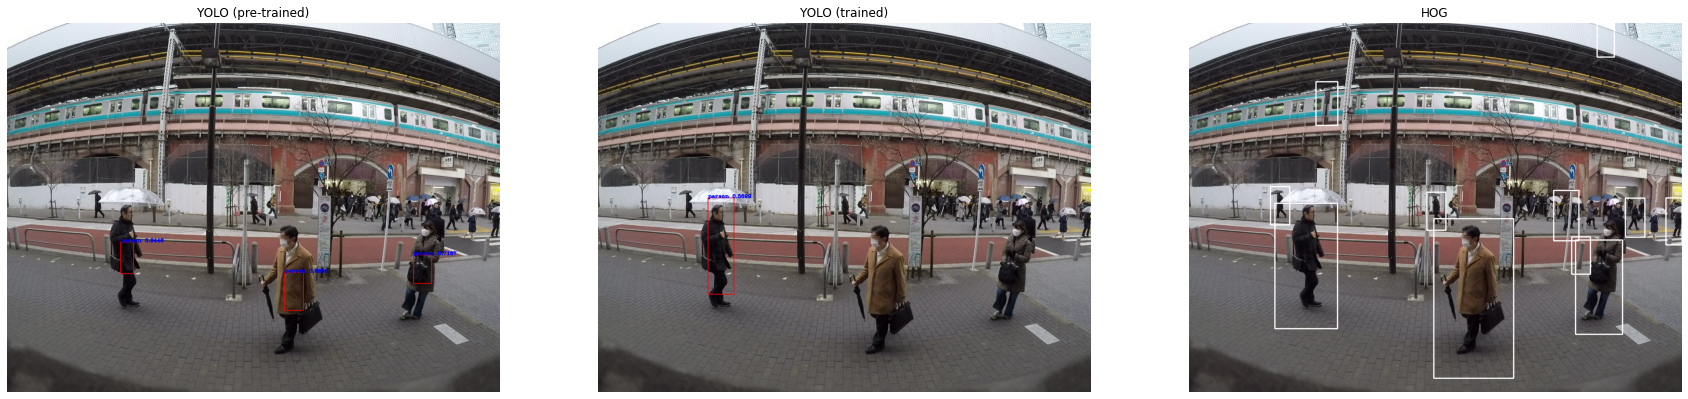

In [49]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.title("YOLO (pre-trained)")
plt.imshow(img_yoloP)
plt.axis('off')
plt.subplot(1,3,2)
plt.title("YOLO (trained)")
plt.imshow(img_yoloL)
plt.axis('off')
plt.subplot(1,3,3)
plt.title("HOG")
plt.imshow(img_hog)
plt.axis('off')
plt.show()

### 放課後ノック110：YOLOでの人以外の物体の検出のようすを確認しよう

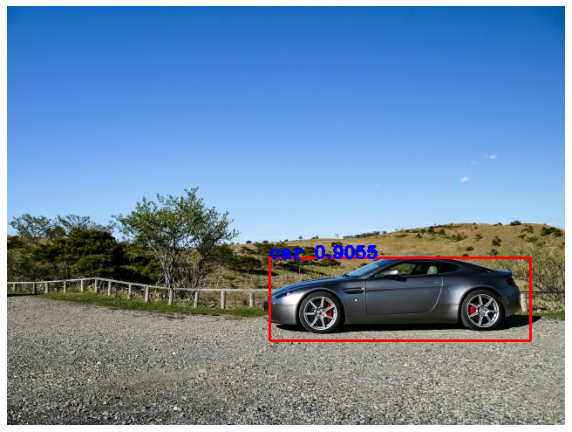

In [50]:
img_filename = "img/img02.jpg"

#画像の読み込み
img_rawP = tf.image.decode_jpeg(open(img_filename, 'rb').read(), channels=3)
img_yoloP = transform_images(img_rawP, data_shape[0])
img_yoloP = np.expand_dims(img_yoloP, 0)

#クラス名の読み込み
yolo_class_names = [c.strip() for c in open("./yolov3_tf2/data/coco.names").readlines()]

#予測開始
boxes, scores, classes, nums = yolo.predict(img_yoloP)

#予測結果を画像に書き込み
img_yoloP = img_rawP.numpy()
img_yoloP = draw_outputs(img_yoloP, (boxes, scores, classes, nums), yolo_class_names)

#予測結果を書き込んだ画像の表示
plt.figure(figsize=(10,10))
plt.imshow(img_yoloP)
plt.axis('off')
plt.show()